In [1]:
import pandas as pd
import numpy as np

path = 'census.csv'

data_frame = pd.read_csv(path)
print(display(data_frame.head()))

age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   
3   53            Private            11th            7.0   Married-civ-spouse   
4   28            Private       Bachelors           13.0   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   capital-loss  hours-per-week  native-country income  
0           0.0            40.0   United-States  <=50K  
1           0.0            13.0   United-States  <=50K  
2           0.0            40.0   United-States  <=50K  
3           0.0            40.0   United-States  <=50K  
4           0.0            40.0            Cuba  <=50K

None


In [2]:
data_types = data_frame.dtypes
print(data_types)

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object


In [3]:
no_of_uniques = data_frame.nunique()
print(no_of_uniques)

age                 74
workclass            7
education_level     16
education-num       16
marital-status       7
occupation          14
relationship         6
race                 5
sex                  2
capital-gain       121
capital-loss        97
hours-per-week      96
native-country      41
income               2
dtype: int64


In [4]:
print(pd.DataFrame({'Data types': data_types, 'No of uniques': no_of_uniques}))

                Data types  No of uniques
age                  int64             74
workclass           object              7
education_level     object             16
education-num      float64             16
marital-status      object              7
occupation          object             14
relationship        object              6
race                object              5
sex                 object              2
capital-gain       float64            121
capital-loss       float64             97
hours-per-week     float64             96
native-country      object             41
income              object              2


In [5]:
def check_dtypes(df):
    data_types = df.dtypes
    uniques = df.nunique()
    return pd.DataFrame({'Data types': data_types, 'No of uniques': uniques})

print(display(check_dtypes(data_frame)))

Data types  No of uniques
age                  int64             74
workclass           object              7
education_level     object             16
education-num      float64             16
marital-status      object              7
occupation          object             14
relationship        object              6
race                object              5
sex                 object              2
capital-gain       float64            121
capital-loss       float64             97
hours-per-week     float64             96
native-country      object             41
income              object              2

None


In [6]:
null = data_frame.isnull().sum()
# print(null)

ratio = (null / data_frame.shape[0]) * 100
print(ratio)

table = pd.DataFrame({'nulls':null, 'ratio of nulls':ratio}).T
print(display(table))

age                0.0
workclass          0.0
education_level    0.0
education-num      0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
sex                0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64


age  workclass  education_level  education-num  \
nulls           0.0        0.0              0.0            0.0   
ratio of nulls  0.0        0.0              0.0            0.0   

                marital-status  occupation  relationship  race  sex  \
nulls                      0.0         0.0           0.0   0.0  0.0   
ratio of nulls             0.0         0.0           0.0   0.0  0.0   

                capital-gain  capital-loss  hours-per-week  native-country  \
nulls                    0.0           0.0             0.0             0.0   
ratio of nulls           0.0           0.0             0.0             0.0   

                income  
nulls              0.0  
ratio of nulls     0.0

None


In [7]:
import pandas
import numpy
data_frame.shape

(45222, 14)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# firstly we will get outliers of age and fare (b: they're numerical values)

# 1- gather all numerical columns
num_cols = data_frame.select_dtypes('number').columns
num_cols

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

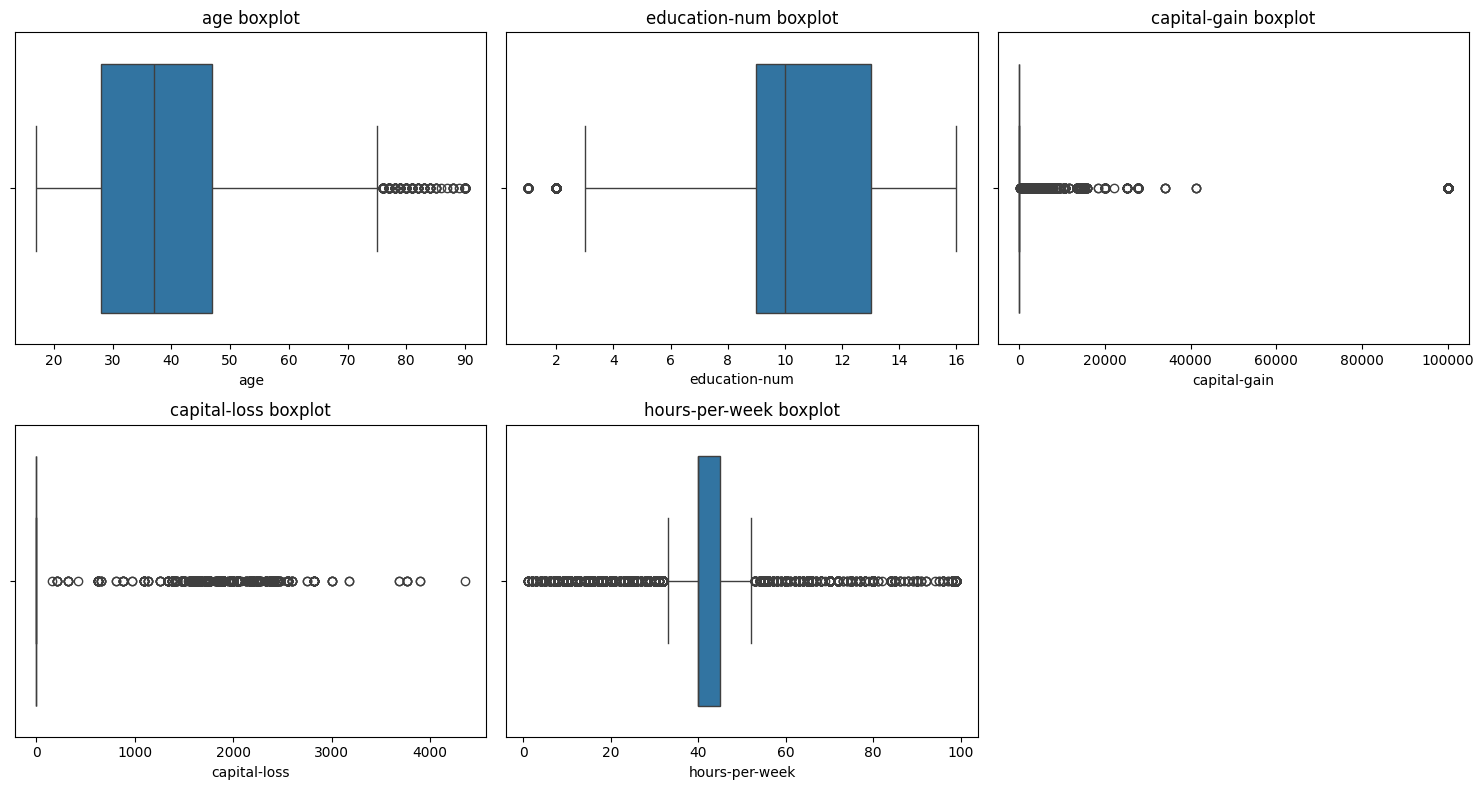

In [9]:
num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'] 
rows = 2
cols = 3
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1) 
    sns.boxplot(data_frame[col], orient='h')
    plt.title(f"{col} boxplot")

plt.tight_layout()
plt.show()

In [10]:
# edit outliers
for col in num_cols:
    Q1 = data_frame[col].quantile(.25)
    Q3 = data_frame[col].quantile(.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    print(IQR)
    print(lower_fence, upper_fence)
    lower_outliers = data_frame[data_frame[col] < lower_fence][col].values
    upper_outliers = data_frame[data_frame[col] > upper_fence][col].values
    data_frame[col].replace(lower_outliers, lower_fence)
    data_frame[col].replace(upper_outliers, upper_fence)
print(len(lower_outliers))

19.0
-0.5 75.5
4.0
3.0 19.0
0.0
0.0 0.0
0.0
0.0 0.0
5.0
32.5 52.5
6918


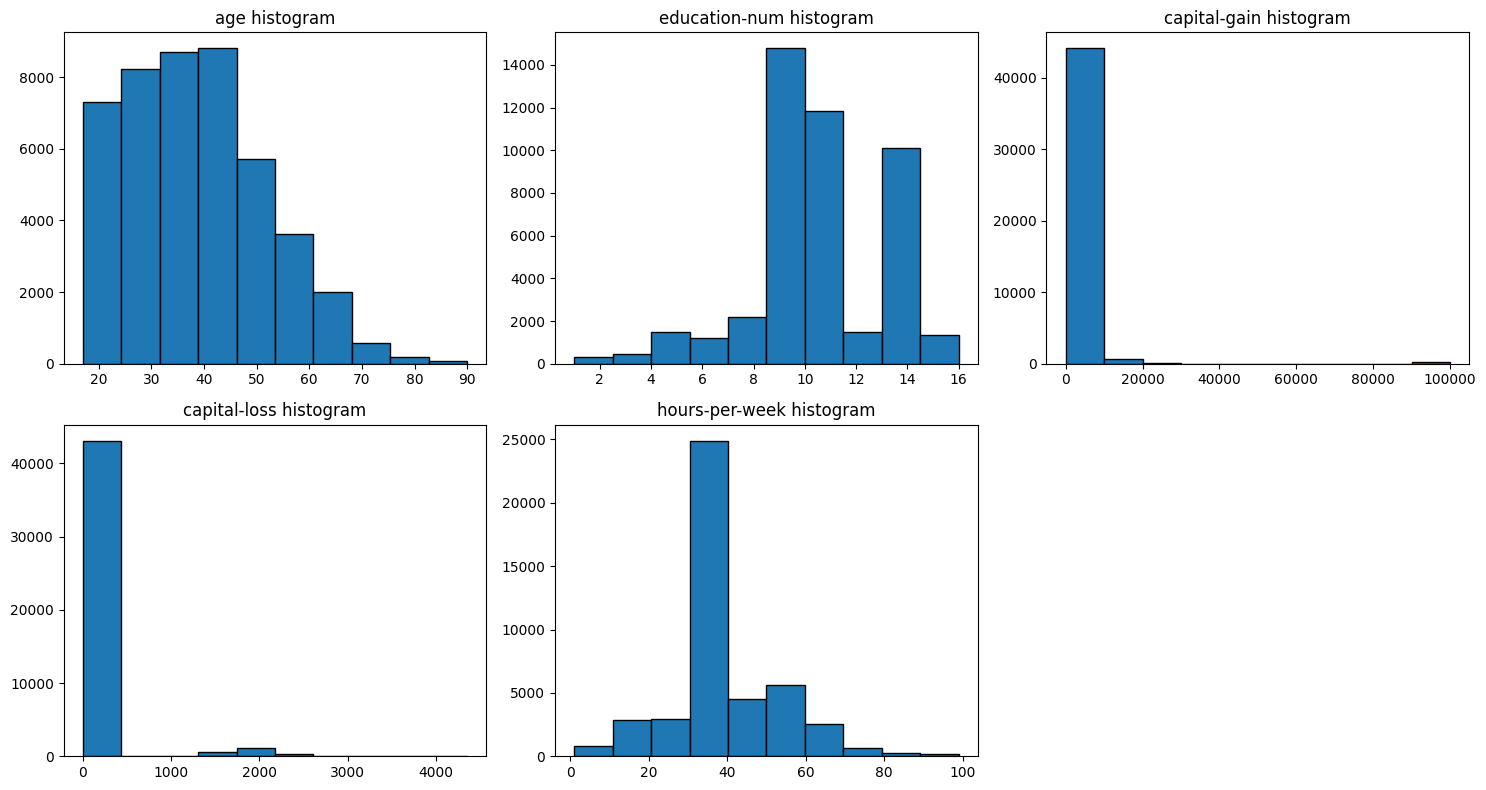

In [11]:
rows = 2
cols = 3 
plt.figure(figsize=(15, 8)) 

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1) 
    plt.hist(data_frame[col], edgecolor='black')
    plt.title(f"{col} histogram")

plt.tight_layout()
plt.show()

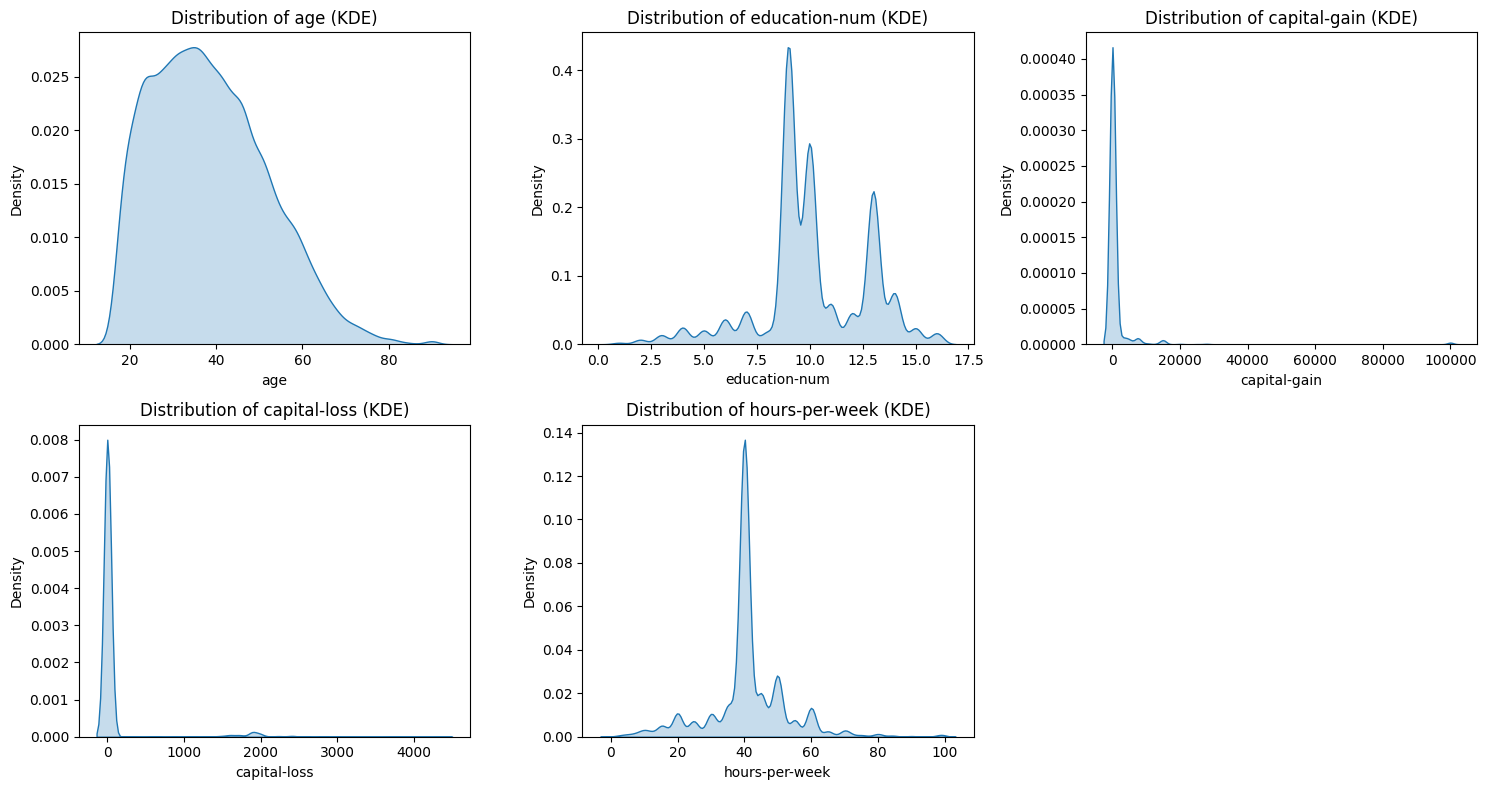

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'] 
ROWS = 2
COLS = 3 
num_plots = len(num_cols)

plt.figure(figsize=(15, 8)) 

for i, col in enumerate(num_cols):
    plt.subplot(ROWS, COLS, i + 1) 

    sns.kdeplot(data=data_frame, x=col, fill=True)
    
    plt.title(f"Distribution of {col} (KDE)")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

C:\Users\salma\AppData\Local\Temp\ipykernel_5620\2502150973.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data_frame, palette='viridis')
C:\Users\salma\AppData\Local\Temp\ipykernel_5620\2502150973.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data_frame, palette='viridis')
C:\Users\salma\AppData\Local\Temp\ipykernel_5620\2502150973.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data_frame, palette='viridis')
C:\Users\salma\AppData\Local\Temp\ipykernel_5620\2502150973.py:15: Future

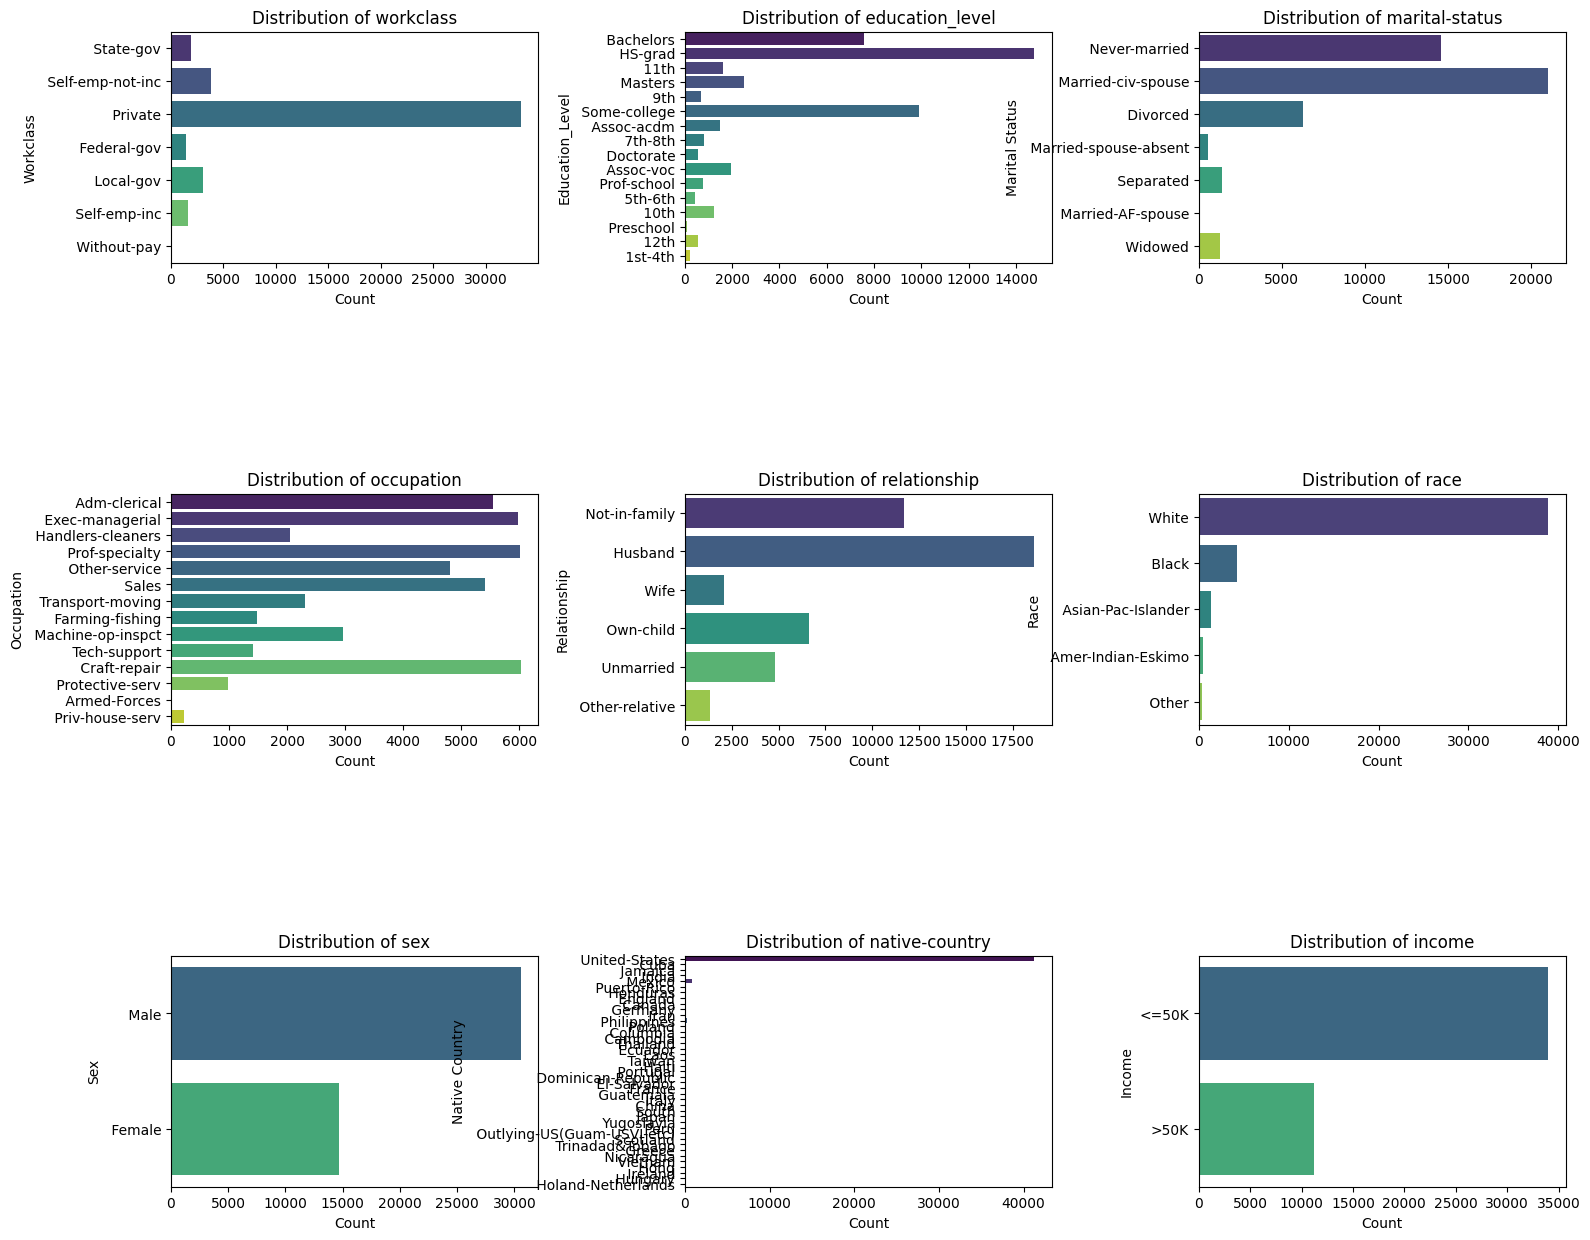

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

category_columns = data_frame.select_dtypes(include=['object']).columns

ROWS = 3
COLS = 3
# Increased figure size for more space
plt.figure(figsize=(18, 15)) 

for i, col in enumerate(category_columns):
    plt.subplot(ROWS, COLS, i + 1)
    # Using y-axis for categories is correct for readability
    sns.countplot(y=col, data=data_frame, palette='viridis') 
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col.replace('-', ' ').title())

# Significantly increased hspace to separate plots vertically
# Increased wspace slightly for horizontal separation
plt.subplots_adjust(hspace = 1.0, wspace = 0.4)
plt.show()

In [17]:
import pandas as pd
import plotly.express as px

# 1. Load data and clean column names
# Assumes 'census.csv' is in the same directory
data_frame = pd.read_csv("census.csv")
data_frame.columns = data_frame.columns.str.strip()

# 2. Create the scatter plot
# X='age', Y='hours-per-week', colored by 'income'
fig = px.scatter(
    data_frame, 
    x='age', 
    y='hours-per-week', 
    color='income', 
    title='Age vs. Hours Worked per Week (Colored by Income)', 
    labels={
        "age": "Age (Years)", 
        "hours-per-week": "Hours Per Week", 
        "income": "Income Level"
    },
    opacity=0.6,
    hover_data=['education_level', 'occupation']
)

# 3. Display the plot
fig.show()


In [19]:
fig = px.histogram(data_frame, x = 'income', color = 'sex', title = '<b> income based on gender', barmode='group')
fig.update_layout(width = 600, height = 500, bargap = 0.2)
fig.show()